In [288]:
import pandas as pd
import numpy as np
from scipy import stats

In [79]:
course_reviews_data = pd.read_csv("2024_02_21_all_reviews", index_col=0)
df = pd.DataFrame(course_reviews_data)

In [80]:
df.head()

,course_code,status_code,star_count,prof_name,prof_slug,grade,reviewer_name,date,review_text,review_id
0,NFSC112,200,4,Abani Pradhan,/professor/pradhan,Expecting an A,Anonymous,12/23/2023,"Didn't learn anything, but didn't need to. Eas...",review-31256
1,NFSC112,200,5,Qin Wang,/professor/wang_qin,Expecting an A,Anonymous,12/18/2023,Easy class. The lectures are asynchronous but ...,review-30485
2,NFSC112,200,5,Xiaoxue Jia,/professor/jia_xiaoxue,Expecting an A,Anonymous,12/13/2023,She is amazing with ADS and helpful with answe...,review-29852
3,NFSC112,200,2,Abani Pradhan,/professor/pradhan,Expecting a B-,Anonymous,12/06/2023,Easy class as long as you actually watch the l...,review-28855
4,NFSC112,200,5,Qin Wang,/professor/wang_qin,Expecting an A,Anonymous,11/26/2023,"she is a good lecturer, nfsc 112, is ""chill,"" ...",review-28192


In [81]:
# extract dept and course_num using a regular expression
df[['dept', 'course_num']] = df['course_code'].str.extract('([A-Z]{4})([0-9]+[A-Z]*)', expand=True)

# rename grade => expected_grade
df = df.rename(columns={"grade": "expected_grade"})

# convert date => datetime
df['date'] = pd.to_datetime(df['date'])

# drop status_code, prof_slug, review_id, and course_code
df = df.loc[:, ~df.columns.isin(['status_code', 'prof_slug','review_id'])]

df['star_count'] = pd.to_numeric(df['star_count'])

df.head(5)

,star_count,prof_name,expected_grade,reviewer_name,date,review_text,dept,course_num
0,4,Abani Pradhan,Expecting an A,Anonymous,2023-12-23,"Didn't learn anything, but didn't need to. Eas...",NFSC,112
1,5,Qin Wang,Expecting an A,Anonymous,2023-12-18,Easy class. The lectures are asynchronous but ...,NFSC,112
2,5,Xiaoxue Jia,Expecting an A,Anonymous,2023-12-13,She is amazing with ADS and helpful with answe...,NFSC,112
3,2,Abani Pradhan,Expecting a B-,Anonymous,2023-12-06,Easy class as long as you actually watch the l...,NFSC,112
4,5,Qin Wang,Expecting an A,Anonymous,2023-11-26,"she is a good lecturer, nfsc 112, is ""chill,"" ...",NFSC,112


In [293]:
# clean up expected grades
df.expected_grade.value_counts()

expected_grade
A     9189
A+    4014
A-    2613
B     2415
B+    1569
B-     646
C      636
C+     290
C-     217
W      113
D       82
P       80
F       70
D+      44
D-      10
?        8
XF       6
B?       5
BC       3
??       2
C?       2
65       1
95       1
85       1
CB       1
F+       1
CD       1
-        1
74       1
I        1
S        1
-A       1
AA       1
A?       1
AU       1
Name: count, dtype: int64

In [87]:
df['expected_grade'] = df['expected_grade'].str.extract('(Expecting a[n]? )([A-z0-9\-?+]{1,2})', expand=True)[1]
df.expected_grade = df.expected_grade.str.upper()
df.expected_grade.value_counts()

expected_grade
A     9189
A+    4014
A-    2613
B     2415
B+    1569
B-     646
C      636
C+     290
C-     217
W      113
D       82
P       80
F       70
D+      44
D-      10
?        8
XF       6
B?       5
BC       3
??       2
C?       2
65       1
95       1
85       1
CB       1
F+       1
CD       1
-        1
74       1
I        1
S        1
-A       1
AA       1
A?       1
AU       1
Name: count, dtype: int64

In [89]:
# map letter grades to numeric
grade_mapper = {
    "A+":4.0,
    "A":4.0,
    "AA":4.0,
    "A?":4.0,
    "A-":3.7,
    "-A":3.7,
    "B+":3.3,
    "B":3.0,
    "B?":3.0,
    "B-":2.7,
    "BC":2.5,
    "CB":2.5,
    "C+":2.3,
    "C":2.0,
    "C?":2.0,
    "C-":1.7,
    "CD":1.5,
    "D+":1.3,
    "D":1.0,
    "D-":0.7,
    "F":0,
    "F+":0,
    "XF":0,
    "P":None,
    "S":None,
    "I":None,
    "-":None,
    "AU":None,
    "??":None,
    "?":None,
    "W":None
}

def map_grades_to_gpa(letter_grade):
    if pd.isna(letter_grade) or letter_grade == np.nan :
        return None
    else:
        if letter_grade.isnumeric():
            return None
        elif ( letter_grade in grade_mapper.keys()):
            return grade_mapper[letter_grade]
        else:
            print("Not in mapper: " +letter_grade)
            return None

df['gpa_grade'] = df['expected_grade'].apply(map_grades_to_gpa)
        

In [90]:
df.head(6)

,star_count,prof_name,expected_grade,reviewer_name,date,review_text,dept,course_num,gpa_grade
0,4,Abani Pradhan,A,Anonymous,2023-12-23,"Didn't learn anything, but didn't need to. Eas...",NFSC,112,4.0
1,5,Qin Wang,A,Anonymous,2023-12-18,Easy class. The lectures are asynchronous but ...,NFSC,112,4.0
2,5,Xiaoxue Jia,A,Anonymous,2023-12-13,She is amazing with ADS and helpful with answe...,NFSC,112,4.0
3,2,Abani Pradhan,B-,Anonymous,2023-12-06,Easy class as long as you actually watch the l...,NFSC,112,2.7
4,5,Qin Wang,A,Anonymous,2023-11-26,"she is a good lecturer, nfsc 112, is ""chill,"" ...",NFSC,112,4.0
5,5,Qin Wang,A+,Anonymous,2022-12-28,super chill and easy class... lectures are onl...,NFSC,112,4.0


In [91]:
df['gpa_grade'].value_counts()

gpa_grade
4.0    13205
3.7     2614
3.0     2420
3.3     1569
2.7      646
2.0      638
2.3      290
1.7      217
1.0       82
0.0       77
1.3       44
0.7       10
2.5        4
1.5        1
Name: count, dtype: int64

<Axes: xlabel='gpa_grade'>

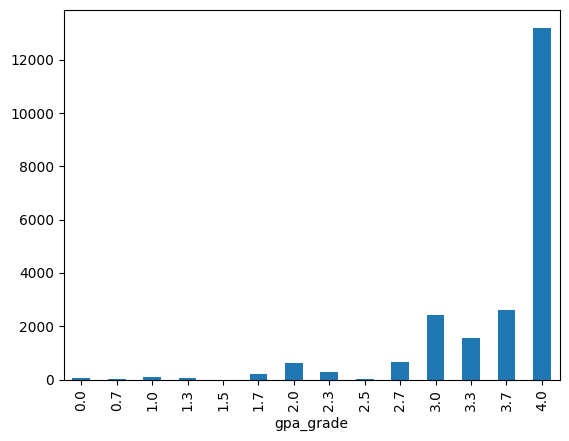

In [93]:
df['gpa_grade'].value_counts().sort_index().plot(kind="bar")

In [57]:
df.expected_grade.isnull().value_counts()

expected_grade
False    26163
Name: count, dtype: int64

<Axes: xlabel='star_count'>

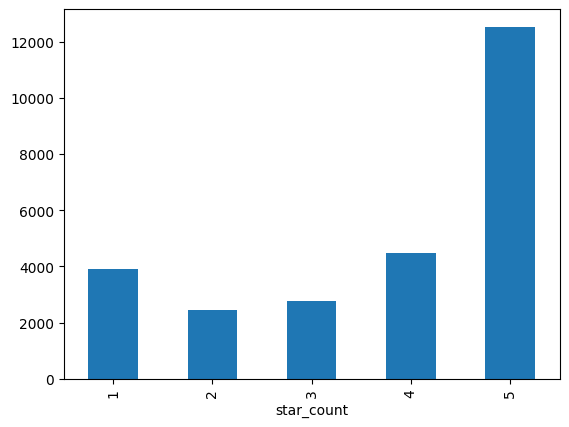

In [11]:
df.star_count.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='year'>

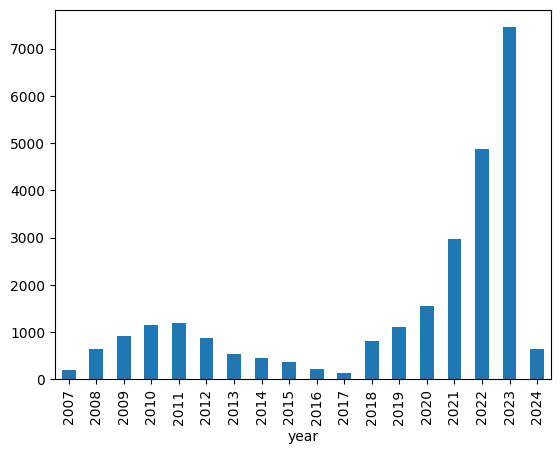

In [124]:
df['month'] = df.date.dt.to_period('M')
df['year'] = df.date.dt.to_period('Y')
df
df.groupby('year').size().plot(kind="bar")

In [221]:
#5 most reviewed courses
top_5_reviewed_departments = df.groupby('dept').size().nlargest(5).index.to_list()
top_5_reviewed_departments

['MATH', 'CMSC', 'BSCI', 'BMGT', 'ENGL']

<Axes: xlabel='year'>

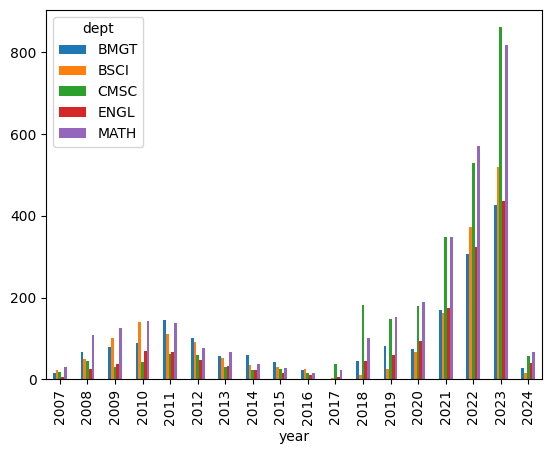

In [222]:
top_5 = df[df['dept'].isin(top_5_reviewed_departments)]
top_5 = top_5.set_index('year')
top_5.groupby(["year","dept"]).count().pivot_table(values="star_count", index="year", columns="dept").plot(kind="bar")

<Axes: xlabel='year'>

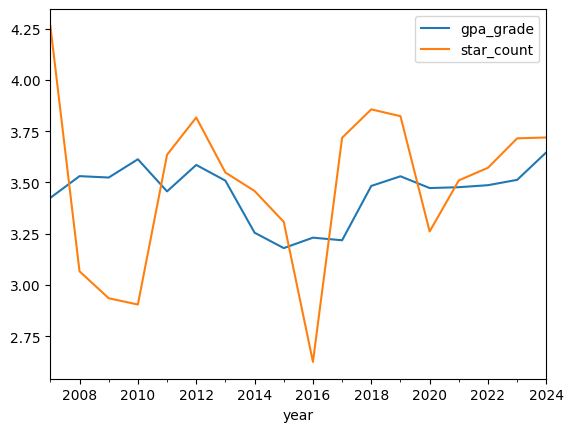

In [250]:
df[df["dept"] == "CMSC"].groupby('year')[['gpa_grade','star_count']].mean().plot()

<Axes: >

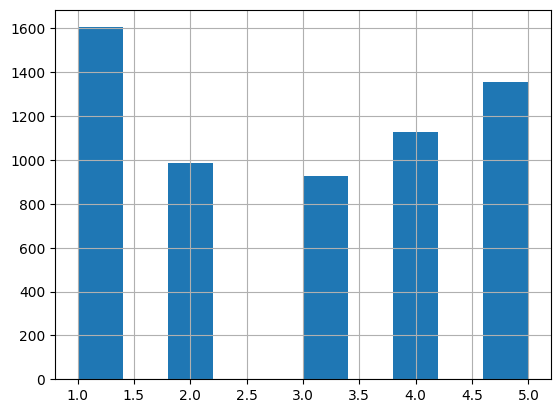

In [249]:
# does someone who is expecting less than an A, on average have the same rating as someone who is expecting an A?
df[df["gpa_grade"] < 3.7]['star_count'].hist()

<Axes: >

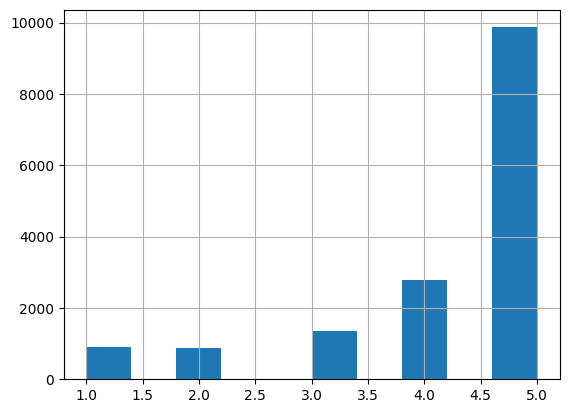

In [248]:
# this is not necessarily surprising, but can we show that there is a statistically significant variation in ratings between the A earners and less than A earners?
df[df["gpa_grade"] >= 3.7]["star_count"].hist()

In [291]:
# does this change over time?
# i.e. are people's ratings correlated with their expected grade moreso now than they have been in the past?
# i.e. do people now expect to get good grades?
greater_than_eq_3pt7 = pd.Series(df[df["gpa_grade"] >= 3.7]["star_count"].value_counts().sort_index(),name="ratings_from_As")
greater_than_eq_3pt7

star_count
1     909
2     885
3    1361
4    2796
5    9868
Name: ratings_from_As, dtype: int64

In [297]:
less_than_3pt7 = pd.Series(df[df["gpa_grade"] < 3.7]["star_count"].value_counts().sort_index(),name="ratings_from_less_than_As")
less_than_3pt7
crosstab = pd.concat([greater_than_eq_3pt7,less_than_3pt7], axis=1)
crosstab

,ratings_from_As,ratings_from_less_than_As
star_count,,
1,909,1605
2,885,984
3,1361,925
4,2796,1129
5,9868,1355


In [298]:
#H0: the distribution of course ratings (star count) is the same for the groups of:
#       students who are expecting an A- or higher 
#       students who are expecting less than an A-
# HA: the distribution of course ratings (star_count) is different for the two groups.
# Assume alpha of .05
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=3794.396207520017, pvalue=0.0, dof=4, expected_freq=array([[1822.84301233,  691.15698767],
       [1355.16849246,  513.83150754],
       [1657.52550763,  628.47449237],
       [2845.92634184, 1079.07365816],
       [8137.53664573, 3085.46335427]]))

In [ ]:
# Our p-value is 0.0, indicating a statistically significant difference in the rating distributions between the two groups. 
# The conclusion is that we would reject the null hypothesis.

In [299]:
# calculate correlation coefficient between expected grade and review rating for groupby on year and see if it's changed over years